<center>
<h1>CSCI3151 - Foundations of Machine Learning</h1>
<h1>Assignment 3</h1>
Summer 2021
</center>

<center>
<b> Due on: 12 July 2021, 23:30 ADT  </b> 
</center>

Submit your assignment as a single `.ipynb` file **(please do not zip it when submitting to brightspace)** including your answers to both the math and the experimental questions, in the correct order. Use markdown syntax to format your answers.

Note: in solving the math questions, aim for general (symbolic) solutions and substitute the specific numbers at the end. This demonstrates a solid understanding of the key concepts. 
You can answer the math questions in two ways:
*   **Use LaTeX to typeset the equations**. Section H of [this LaTeX reference sheet](http://tug.ctan.org/info/latex-refsheet/LaTeX_RefSheet.pdf) is a good reference. Here is another [LaTeX reference sheet](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference).
The equations in the questions are typeset in LaTeX, so you can use them as examples. 
*   **Use neat handwriting**, scan your solution using [AdobeScan](https://acrobat.adobe.com/ca/en/mobile/scanner-app.html), or [Dropbox](https://www.dropbox.com/doc-scanner-app) on your mobile phone, upload the image file, and embed it in your solution notebook. To this end (1) create an empty Markdown cell. 2) Drag-and-drop the image file into the empty Markdown cell, or click on the image icon at the top of the cell and select the image file. The Markdown code that will embed the image then appears.   


Your answers to the experimental questions should be in your solution notebook, in the form of code and text cells, using markdown for your text responses. **You should also include the results of running your code. This means that you must not clear the output produced by your program**.

The marking criteria are described in rubrics. There are two rubrics, for math questions, and for experimental questions, respectively. 

You can submit multiple editions of your assignment. Only the last one will be marked. It is recommended to upload a complete submission, even if you are still improving it, so that you have something into the system if your computer fails for whatever reason.  

**IMPORTANT**: PLEASE NAME YOUR PYTHON NOTEBOOK FILE AS: 
* `<LAST_NAME>-<FIRST_NAME>-Assignment-N.ipynb`

for example: **Soto-Axel-Assignment-3.ipynb** \\


In [115]:
!pip install TeX
!pip install LaTeX
! sudo apt-get install texlive-latex-recommended 
! sudo apt install texlive-latex-extra
! sudo apt install dvipng
! sudo apt install cm-super

Reading package lists... Done
Building dependency tree       
Reading state information... Done
texlive-latex-recommended is already the newest version (2017.20180305-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
texlive-latex-extra is already the newest version (2017.20180305-2).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
dvipng is already the newest version (1.15-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
cm-super is already the newest version (0.3.4-11).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


## **1. Data generation** (2 pts)









 

In this question we are going to generate data corresponding to a mixture of Gaussians.

a) Program a generative model of red blood cell counts for samples in a blood bank, knowing
that males have a mean equal to 5.4 million cells/μL (with a standard deviation equal to 0.28
million cells/μL) and females have a mean equal to 4.2 million cells/μL (with a standard
deviation equal to 0.2 million cells/μL). Keep in mind that donations by women are more
common, as only 40% of the donations have been made by men.

In [116]:
import numpy as np

np.random.seed(42)

def get_model(mean=(5.4, 4.2), std=(0.28,0.2), split=(0.4, 0.6), population=10000, get_total=False):
    assert len(mean) == len(std) == len(split), "Size of input tuples must be same."
    
    distributions = [np.random.normal(mean[i], std[i], round(population * split[i])) for i in range(len(mean))]
    
    if get_total:
        return np.concatenate(distributions)
    
    return distributions

b) Generate a population of 10,000 individuals and plot the joint histogram.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


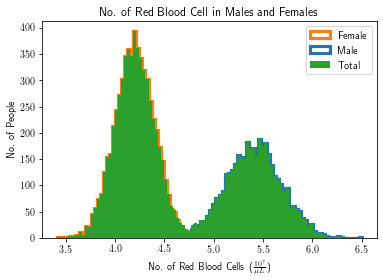

In [117]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['text.usetex'] = True

def model_plot(distributions=get_model(), no_of_bins=100, labels=("Male", "Female")):
    fig, ax = plt.subplots()
    
    assert len(labels) == len(distributions), "Not enough labels."
    
    ax.hist(distributions, no_of_bins, density=False, label=labels, histtype="step", linewidth=3.14)
        
    total_distribution = np.concatenate(distributions)
    total_label = "Total"
    
    ax.hist(total_distribution, no_of_bins, density=False, label=total_label)
    ax.legend(loc='best')
    
    ax.set_xlabel(r"No. of Red Blood Cells ($\frac{10^7}{\mu{L}}$)")
    ax.set_ylabel("No. of People")
    ax.set_title("No. of Red Blood Cell in Males and Females")
    
model_plot()

## **2.Multi-label classification using Naive Bayes** (5 pts)

In this question you will implement Naive Bayes to classify the topic of newsgroup posts.This method works fairly well for certain text classification tasks. This is indeed the case for newsgroup post classification given that there are words that convey a strong indication of a post belonging to a certain topic.

You will make use of the 20 newsgroup Dataset, which can be found in  sklearn(The training subset has been fetched for you) . Utilize [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) to convert the words to vector representations. Experiment with the parameters as needed.
>(Please refer [here](https://scikit-learn.org/stable/modules/feature_extraction.html#tfidf-term-weighting) for more details about sklearn implementation of Tf-idf)

In [118]:
from sklearn.datasets import fetch_20newsgroups
import numpy as np

def get_data_set(subset="train", peek=False, cats=False):
    newsgroups = fetch_20newsgroups(remove=('headers','footers','quotes'),subset=subset)
    remove_ws = lambda x: " ".join(x.split())
    X = list(map(remove_ws,newsgroups.data))
    y = newsgroups.target
    categories = newsgroups.target_names 
      
    if peek: 
        print(newsgroups.DESCR)
    
    if cats:
      return X, y, categories

    return X, y

a) First you will build a classifier on the above training set. You will be using [Multinomial Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn-naive-bayes-multinomialnb) from sklearn for this task. Make sure you account for the zero counts (smoothing), so that a prediction is not penalized just because it uses a word that is not present in the training set. 

In [119]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

# Train X, Train y, Test X, Test y respectively.
def get_vectorized_data(X_0, y_0, X_1, y_1, categories):
    vectorizer = TfidfVectorizer()
    X_0 = vectorizer.fit_transform(X_0)
    X_1 = vectorizer.transform(X_1)
    
    return X_0, y_0, X_1, y_1, categories, vectorizer

In [120]:
def get_trained_model(X_0, y_0):
    clf = MultinomialNB()
    clf.fit(X_0, y_0)

    return clf

How well does the classifier fits the training set ?

=============== Metrics ===============
precision: 0.89
recall: 0.79
f1-score: 0.79
support: 11314.00


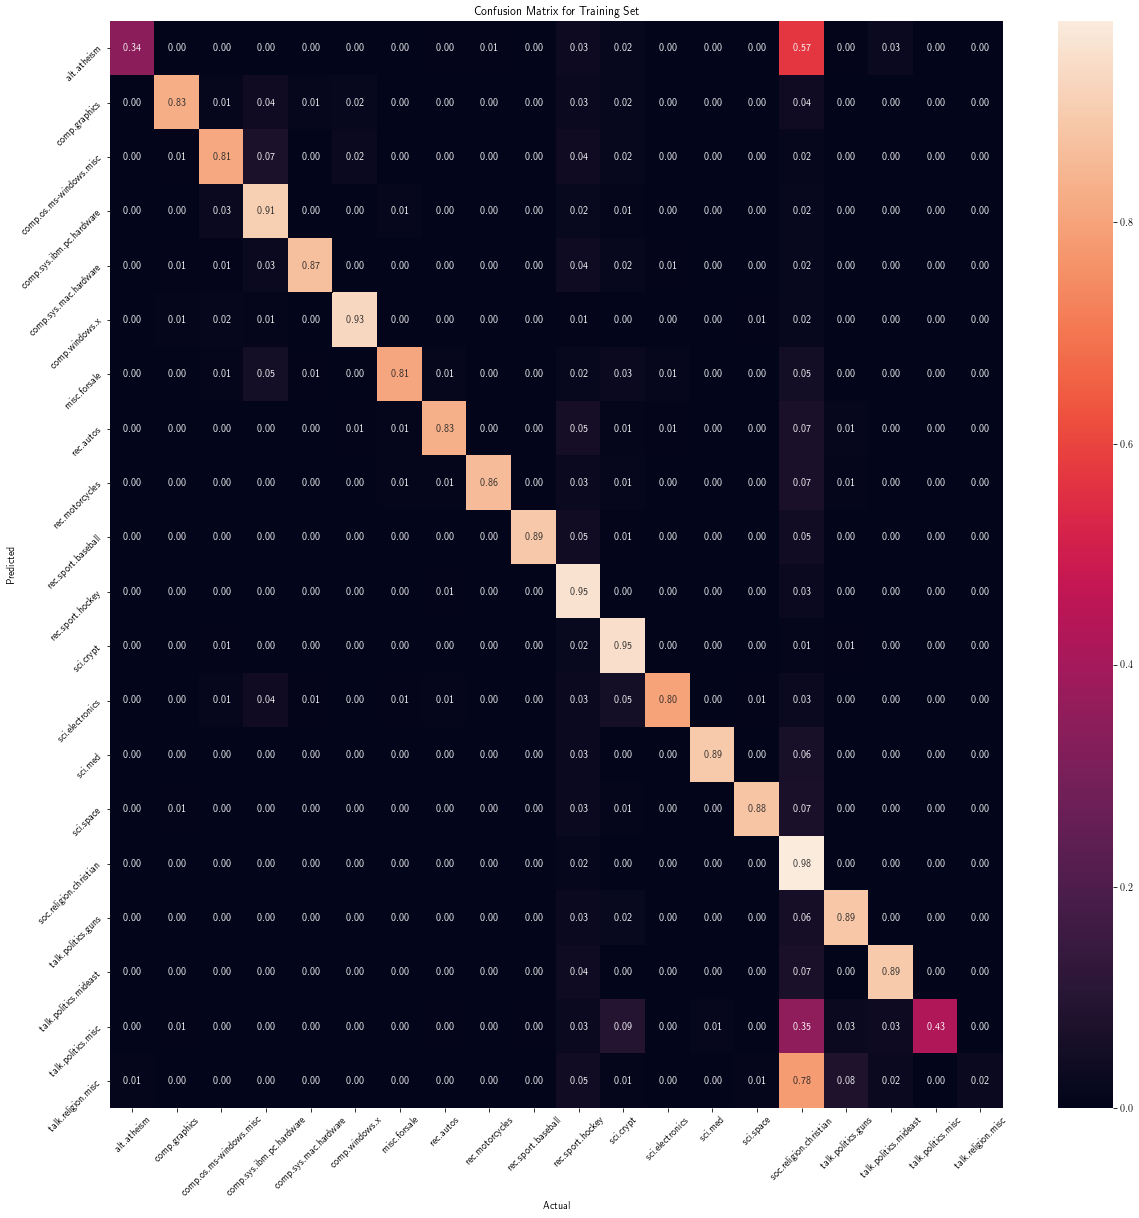

In [121]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from math import floor

def show_metrics(
    clf,
    X,
    y,
    categories,
    title="Confusion Matrix",
    x_label="Actual",
    y_label="Predicted"
):  
    y_pred = clf.predict(X)
    report = classification_report(y, y_pred, output_dict=True)
    cm = confusion_matrix(y, y_pred, normalize='true')

    fig, ax = plt.subplots(figsize=(20, 20))
    ax = sns.heatmap(cm, ax=ax, annot=True, fmt=".2f")
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

    x_ticks = [categories[floor(i)] for i in ax.get_xticks()]
    y_ticks = [categories[floor(i)] for i in ax.get_yticks()]

    ax.set_xticklabels(x_ticks,rotation=45)
    ax.set_yticklabels(y_ticks, rotation=45)

    print("=============== Metrics ===============")

    for title, value in report["macro avg"].items():
      print(f"{title}: {value:.2f}")

    print("======================================")
    

# Confusion matrix for training test.
X_0, y_0, X_1, y_1, categories, vectorizer = get_vectorized_data(*(*get_data_set(), *get_data_set("test", cats=True)))
clf = get_trained_model(X_0, y_0)
show_metrics(clf, X_0, y_0, categories, title="Confusion Matrix for Training Set")


While the precision of the model is relatively high (89%), the accuracy of the model is moderate (79%). This indicates the model is somewhat generalizing to the data and has a slight inclination towards the overfitting of the data. Hence, the evidence suggests that the model is likely to perform poorly during testing.

b) For testing fetch the test subset by passing `subset="test"` in the code above. Plot the confusion matrix and report the classification metrics (precision, recall, f1-score) for all the categories. Sklearn's [classfication report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn-metrics-classification-report) is a useful utility for this task.
> Note : Remember to apply identical tranformations (text cleaning, Tf-idf vectorization etc) to the test subset as the training subset before inference.





=============== Metrics ===============
precision: 0.72
recall: 0.58
f1-score: 0.59
support: 7532.00


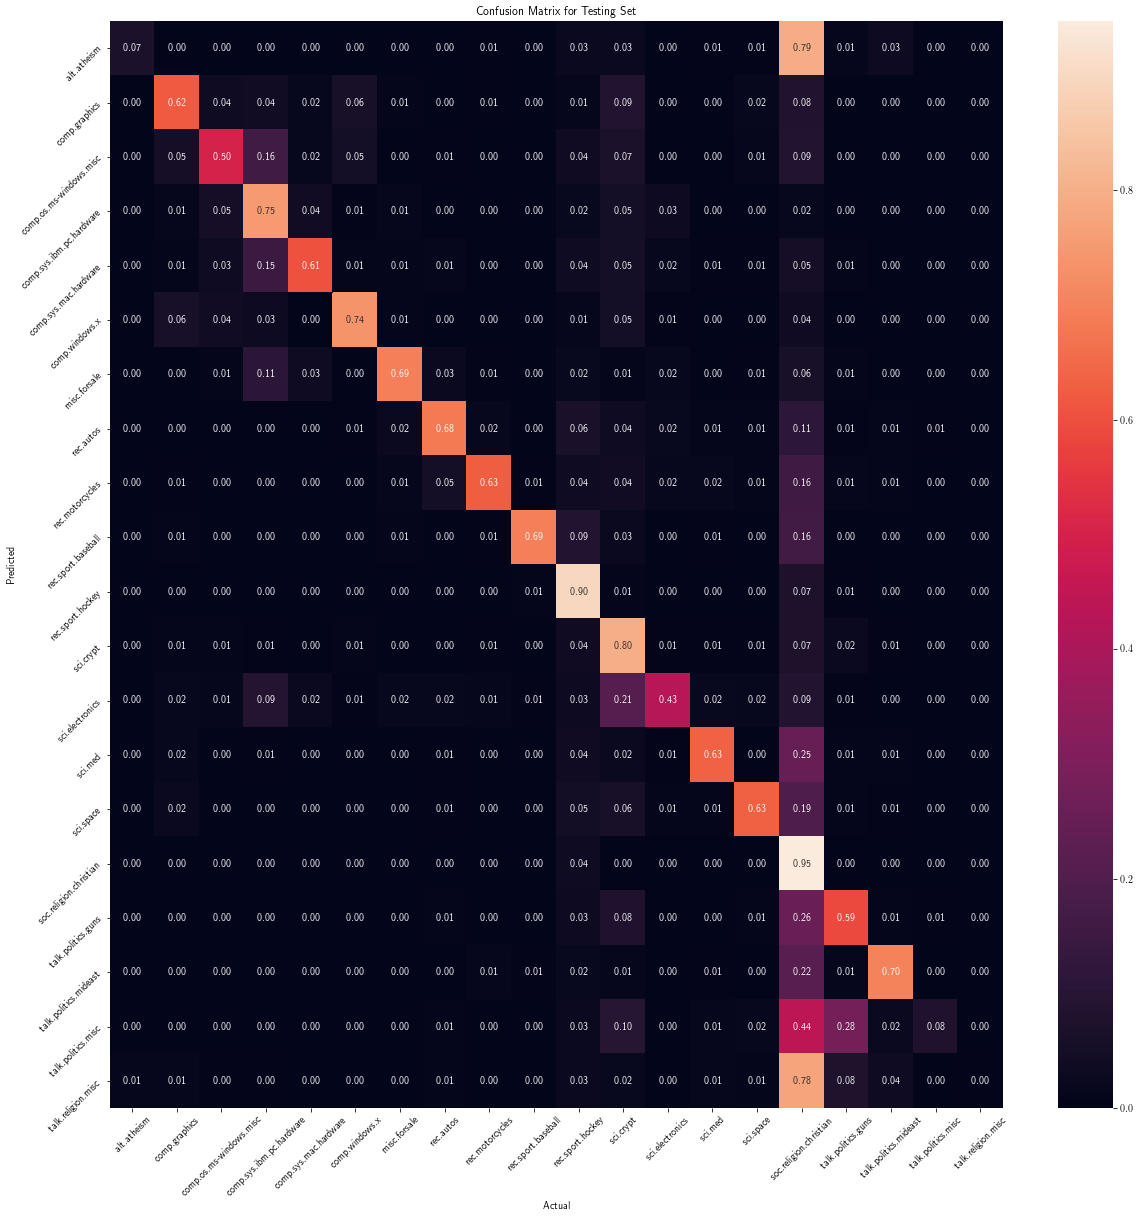

In [122]:
# Confusion matrix for testing test.
show_metrics(clf, X_1, y_1, categories, title="Confusion Matrix for Testing Set")

c) Which category is the model best predictor for? 

Answer: With an accuracy of 95%, the model performs best when evaluating soc.religion.christian words. Additionally, looking at the confusion matrix, we see that this a result of a tendendancy to pick soc.religon.christian even when it's likely to be wrong.




Report the top-10 most representative words or features for that category ie. top-10 words with the highest
$P(X_{i}|category)$ . We'll use the *get_feature_names()* method of  [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) and *feature_log_prob_* attribute of [Multinomial Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn-naive-bayes-multinomialnb) to answer this question.These have been combined in the "show_top10" function below. You are encouraged to find out how this function works and use it to answer the question.

In [123]:
def show_top10(classifier, vectorizer, categories, peek=True):
  "Returns the top 10 most representative features for each class"
  feature_names = np.asarray(vectorizer.get_feature_names())
  for i, category in enumerate(categories):
    top10 = np.argsort(classifier.feature_log_prob_[i])[-10:]
    if peek:
      print("%s: %s" % (category, " ".join(feature_names[top10])))

In [124]:
show_top10(clf, vectorizer, categories)

alt.atheism: not in and it you is that of to the
comp.graphics: you in graphics it is for of and to the
comp.os.ms-windows.misc: file of you for and is it to windows the
comp.sys.ibm.pc.hardware: with scsi for of drive is it and to the
comp.sys.mac.hardware: that apple for of mac it and is to the
comp.windows.x: for this it in of is and window to the
misc.forsale: or in shipping offer 00 to and sale the for
rec.autos: is that in it of you and to car the
rec.motorcycles: for that in of you it and bike to the
rec.sport.baseball: year was is that of in and to he the
rec.sport.hockey: hockey team that game of he and in to the
sci.crypt: in be it is that key and of to the
sci.electronics: that for in it you is and of to the
sci.med: this you that in it and is to of the
sci.space: for that it is in and space of to the
soc.religion.christian: you it in god and is that to of the
talk.politics.guns: it gun is you in and that of to the
talk.politics.mideast: it is israel that you in and to of th

d) Select any 10 samples from the test-set, using the same trained model in (a)  predict the top-2 news category for each of the 10 samples. You can utilize the [predict_proba](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB.predict_proba) method of the classifier for this task.

In [125]:
# Set Seed.
np.random.seed(42)

def predict_top_2(clf,  X, vectorizer, categories, n_samples=2):
  rand_indices = [np.random.randint(0, X.shape[0]) for i in range(n_samples)]
  rand_X = [X[i] for i in rand_indices]
  prob_indices = np.array([np.argsort(clf.predict_proba(x), axis=1).reshape(-1,)[-2:] for x in rand_X])
  prob_categories = [list(map(lambda x: categories[x], classes)) for classes in prob_indices]


  for i,x in enumerate(rand_indices):
    print(f"Sample {x}'s top-2 news categories are {prob_categories[i]}\n")

(predict_top_2(clf, X_1,  vectorizer, categories))

Sample 7270's top-2 news categories are ['comp.sys.ibm.pc.hardware', 'misc.forsale']

Sample 860's top-2 news categories are ['alt.atheism', 'soc.religion.christian']



## **3. Gaussian Mixture Model** (3 pts)



It’s year 2120 and you work as a space taxi driver. One day, you suddenly get lost and find a
new small inhabited planet, which looks like a so far unknown civilization. You meet the planet
prime minister who explains to you that different alien races joined to live on this planet
peacefully. Although the different races look similar, the prime minister explains: “It’s not
clear-cut, but the race can be fairly well distinguished by looking at an alien's height and weight”.
You spent a good amount of time chatting and laughing with the prime minister until you
realized that you had passengers waiting to be picked up.

A few years later, you find that there is a lot of interest in knowing more about this planet, how
many races there are, and what their different races look like. You never managed to find that
planet again (as you know, planets move around). You are clearly not good at memorizing data,
but luckily, the prime minister shared with you the last census data (aliens.csv), which contains
aliens’ heights and weights in meters and kilograms, respectively. Would you be able to infer
how many races there are and what their characteristics are?

In [126]:
# Use this to import the aliens.csv from your local directory.
from google.colab import files
import pandas as pd
import io
uploaded = files.upload()
aliens = pd.read_csv(io.StringIO(uploaded['aliens.csv'].decode('utf-8')),names=['height','weight'])

Saving aliens.csv to aliens (2).csv


a) Run a [Gaussian Mixture Model](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn-mixture-gaussianmixture), so that you can identify the different races in the civilization.
Vary the number of components from 2 to 7. Use the [Akaike information criterion](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture.aic) (AIC) to
provide a metric of the goodness of the approximation for each. Indicate the most likely number
of races.

[22203.450947470228, 17631.159774013875, 14052.744816597315, 10723.11369014475, 10740.919383471137, 10745.35155217987]
AIC of model with component 2 is 22203.45
AIC of model with component 3 is 17631.16
AIC of model with component 4 is 14052.74
AIC of model with component 5 is 10723.11
AIC of model with component 6 is 10740.92
AIC of model with component 7 is 10745.35
There most likely exists 5 alien races.


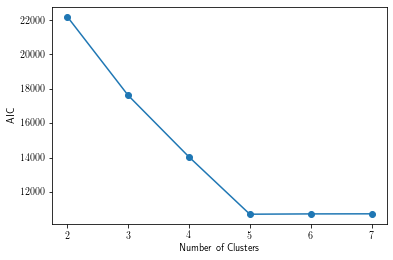

In [127]:
# Plot AIC as a function of number of componenets
from sklearn.mixture import GaussianMixture

def get_classifier_using_aic(data_set, component_range=(2,8), peek=True, plot=True):
  aics = [GaussianMixture(i, random_state=42).fit(data_set).aic(data_set) for i in range(*component_range)]
  print(aics)
  
  for i in range(len(aics)):
    print(f"AIC of model with component {i+2} is {aics[i]:.2f}")

  if plot:
    fig, ax = plt.subplots()
    ax.plot(np.arange(*component_range), aics, "-o")
    ax.set_xlabel("Number of Clusters")
    ax.set_ylabel("AIC")

  print(f"There most likely exists {np.argmin(np.array(aics)) + 2} alien races.")

get_classifier_using_aic(aliens)

b) Using the most probable number of races (# gaussians) based on AIC, plot in a scatter plot of
all your points (heights and weights) where the color of each point is defined by the Gaussian
with the highest posterior probability.

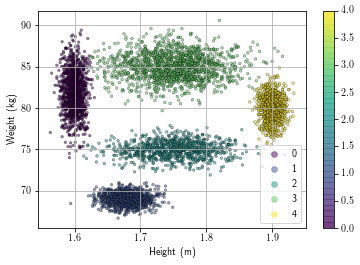

In [128]:
def make_model(data_set, plot=True, n=5, explain=False):
  clf = GaussianMixture(n, random_state=42).fit(data_set)
  pred = clf.predict(data_set)

  if plot:
    fig, ax = plt.subplots()
    sp = ax.scatter(data_set["height"], data_set["weight"], s=7, c=pred, edgecolors="k", linewidths=0.5, alpha=0.5)
    ax.legend(handles=sp.legend_elements()[0], labels=list(range(n+1)), loc="best")
    ax.set_xlabel("Height (m)")
    ax.set_ylabel("Weight (kg)")
    ax.grid(True)
    fig.colorbar(sp)

  if explain:
    print("====== MEAN =====")
    averages = clf.means_
    for i in range(n):
      print(f"Class {i} has an average height of {averages[i][0]:.2f} and an average weight of {averages[i][1]:.2f}")

    print("===== VARIANCE =====")
    variances = clf.covariances_
    print(variances.shape)
    for i in range(n):
      print(f"Class {i} has {variances[i]}")

make_model(aliens, explain=False)

c) Report the parameters of the gaussians so that you can describe the main characteristics for
each race.

====== MEAN =====
Class 0 has an average height of 1.60 and an average weight of 81.98
Class 1 has an average height of 1.68 and an average weight of 69.01
Class 2 has an average height of 1.75 and an average weight of 74.96
Class 3 has an average height of 1.75 and an average weight of 85.00
Class 4 has an average height of 1.90 and an average weight of 80.00
===== VARIANCE =====
(5, 2, 2)
Class 0 has [[ 1.07542743e-04 -7.47970520e-04]
 [-7.47970520e-04  6.22694770e+00]]
Class 1 has [[ 4.28550280e-04 -1.99438005e-04]
 [-1.99438005e-04  4.71197578e-01]]
Class 2 has [[0.00233379 0.00172914]
 [0.00172914 0.98526689]]
Class 3 has [[2.54052945e-03 7.99304710e-04]
 [7.99304710e-04 2.43642001e+00]]
Class 4 has [[ 1.04197058e-04 -6.28895252e-04]
 [-6.28895252e-04  2.12165635e+00]]


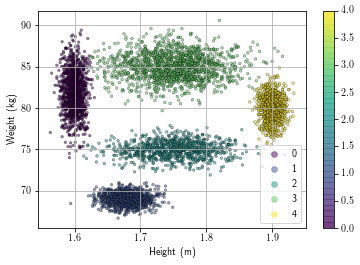

In [129]:
make_model(aliens, explain=True)

Indivduals in Class 0 vary in weight but have similar heights.

Individuals in Class 1 vary slightly in height but have similar weights.

Individuals in Class 2 vary largely in height but are all of a medium build.

Individuals in Class 3 vary largely in height but are all of a large build.

Individuals in Class 4 vary largely in weight but are all tall.